In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from scipy.stats import norm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

C:\Users\tanni\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_table("data/flame.txt", header=None)
X = data.iloc[:,0:2]
y = data[2]

In [69]:
data[2].value_counts()

2    153
1     87
Name: 2, dtype: int64

## Exploration donnée

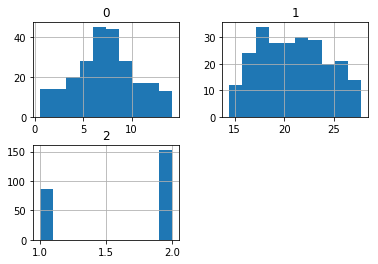

In [24]:
data.hist()
plt.show()

In [16]:
X_scaled = preprocessing.scale(X)

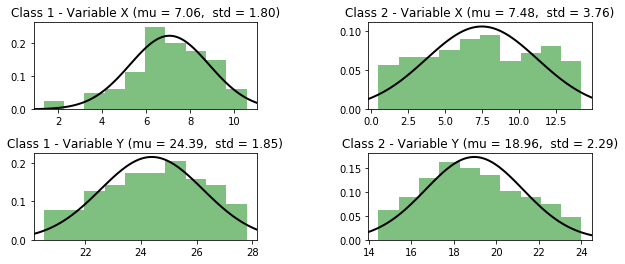

In [132]:
fig, ax = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.set_size_inches(10, 4)

for i in range(0,2):
#     d = preprocessing.scale(data[0][data[2] == i+1])
    d = np.array(data[0][data[2] == i+1])
    ax[0,i].hist(d, density=True, alpha=0.5, color='g')
    # plt.hist(d, bins=15, density=True, alpha=0.5, color='g')
    xmin, xmax = ax[0,i].set_xlim()
    mu, std = norm.fit(d)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax[0,i].plot(x, p, 'k', linewidth=2)
    title = "Class %d - Variable X (mu = %.2f,  std = %.2f)" % (i+1, mu, std)
    ax[0,i].set_title(title)
    
#     d = preprocessing.scale(data[1][data[2] == i+1])
    d = np.array(data[1][data[2] == i+1])
    ax[1,i].hist(d, density=True, alpha=0.5, color='g')
    # plt.hist(d, bins=15, density=True, alpha=0.5, color='g')
    xmin, xmax = ax[1,i].set_xlim()
    mu, std = norm.fit(d)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax[1,i].plot(x, p, 'k', linewidth=2)
    title = "Class %d - Variable Y (mu = %.2f,  std = %.2f)" % (i+1, mu, std)
    ax[1,i].set_title(title)


plt.show()

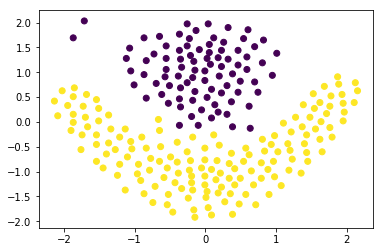

In [21]:
plt.scatter(x = X_scaled[:,0], y = X_scaled[:,1], c=data[2])

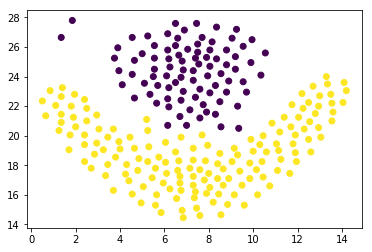

In [41]:
plt.scatter(x = data[0], y = data[1], c=data[2])

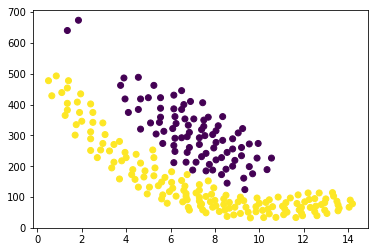

In [149]:
plt.scatter(x = data[0], y = (data[0]-data[1])**2, c=data[2])

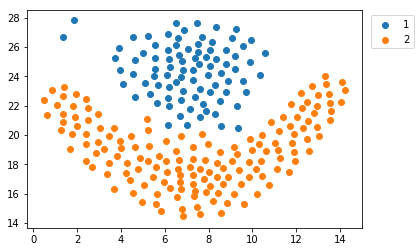

In [66]:
fig, ax = plt.subplots(1, 1)
for x in range(1,3):
    ax.scatter(x = data[0][data[2] == x], y = data[1][data[2] == x], label=str(x))
ax.legend(loc=1, bbox_to_anchor=(1.17,1))

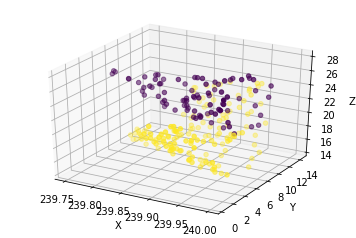

In [3]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

import numpy as np
from scipy.spatial.distance import pdist, squareform
gamma = 2
K = squareform(np.exp(-gamma * pdist(X, 'sqeuclidean')))
D = np.exp(-(K ** 2) / ( 2*gamma**2))
z = np.sum(D, axis=0)

a = data[0]
b = data[1]
c = z
ax.scatter( c, a, b, c=data[2], marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [14]:
clf2_r = svm.SVC(kernel='poly', degree=)

X_train_z = np.concatenate((X, z.reshape(240,1)), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_train_z, y, test_size=0.20)

clf2_r.fit(X_train_z, y)
# predict = clf2_r.predict(X_test)
scores  = cross_val_score(clf2_r, X_train_z, y, cv=50)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.10)


### Model

In [151]:
clf = SVC(kernel='rbf', degree=3)

In [57]:
X_scaled = preprocessing.scale(x)

In [58]:
clf.fit(X_scaled, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
X = np.array(X)

In [153]:
isinstance(clf, SVC)

True

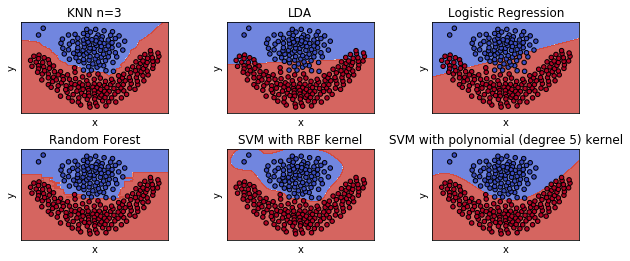

In [177]:
models = (KNeighborsClassifier(3),
          LinearDiscriminantAnalysis(),
          LogisticRegression(),
          RandomForestClassifier(max_depth=15),
          svm.SVC(kernel='rbf', gamma=0.7),
          svm.SVC(kernel='poly', degree=5))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('KNN n=3',
          'LDA',
          'Logistic Regression',
          'Random Forest',
          'SVM with RBF kernel',
          'SVM with polynomial (degree 5) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 3)
fig.set_size_inches(10, 4)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[0], X[1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [169]:
clf2 = SVC(kernel='poly', degree=3)
# clf2.fit(X_train, y_train)
# predict = clf2.predict(X_test)
# accuracy_score(y_test, predict)

In [170]:
scores  = cross_val_score(clf2, X_train, y_train, cv=10)

In [171]:
scores

array([1.        , 1.        , 0.95      , 1.        , 1.        ,
       0.94736842, 1.        , 1.        , 1.        , 0.94444444])

In [172]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.05)


In [191]:
models = (KNeighborsClassifier(3),
          LinearDiscriminantAnalysis(),
          LogisticRegression(),
          RandomForestClassifier(max_depth=15),
          svm.SVC(kernel='rbf', gamma=0.7),
          svm.SVC(kernel='poly', degree=5))

for m in models:
    scores  = cross_val_score(m, X, y, cv=10)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    scores
    print(" ------------- ")

Accuracy: 0.97 (+/- 0.12)
 ------------- 
Accuracy: 0.82 (+/- 0.55)
 ------------- 
Accuracy: 0.84 (+/- 0.55)
 ------------- 
Accuracy: 0.91 (+/- 0.39)
 ------------- 
Accuracy: 0.96 (+/- 0.15)
 ------------- 
Accuracy: 0.95 (+/- 0.17)
 ------------- 


In [4]:
X2 = X.copy()
X2[1] = (data[0]-data[1])**2

models = (KNeighborsClassifier(3),
          LinearDiscriminantAnalysis(),
          LogisticRegression(),
          RandomForestClassifier(max_depth=15),
          svm.SVC(kernel='rbf', gamma=0.7),
          svm.SVC(kernel='poly', degree=3, max_iter=100 ))

for m in models:
    scores  = cross_val_score(m, X2, y, cv=10)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    scores
    print(" ------------- ")

In [8]:
X3 = np.concatenate((X, z.reshape(-1,1)), axis=1)

models = (KNeighborsClassifier(3),
          LinearDiscriminantAnalysis(),
          LogisticRegression(),
          RandomForestClassifier(max_depth=15),
          svm.SVC(kernel='rbf', gamma=0.7),
          svm.SVC(kernel='poly', degree=4))

for m in models:
    scores  = cross_val_score(m, X3, y, cv=10)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    scores
    print(" ------------- ")

Accuracy: 0.97 (+/- 0.12)
 ------------- 
Accuracy: 0.82 (+/- 0.53)
 ------------- 
Accuracy: 0.83 (+/- 0.53)
 ------------- 
Accuracy: 0.90 (+/- 0.43)
 ------------- 
Accuracy: 0.96 (+/- 0.15)
 ------------- 
Accuracy: 0.97 (+/- 0.13)
 ------------- 


In [9]:
z.shape

(240,)

In [163]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
#     if hasattr(clf, "decision_function"):
#         Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#     else:
#         Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
